# <font face="algerian">Bike_   Sharing_   Model_   using_   M.L.R_   by _  Vivek  _ Kumar</font>



In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

# Importing and Understanding Data

<h3>Reading the data from file(day.csv)</h3>

In [2]:
bikedata = pd.read_csv("day.csv")

In [3]:
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking number of rows

In [4]:
bikedata.shape

(730, 16)

### Checking nulls in the given dataset

In [5]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Exploratory Data Analysis

### Visualising co-relation between numerical variables

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

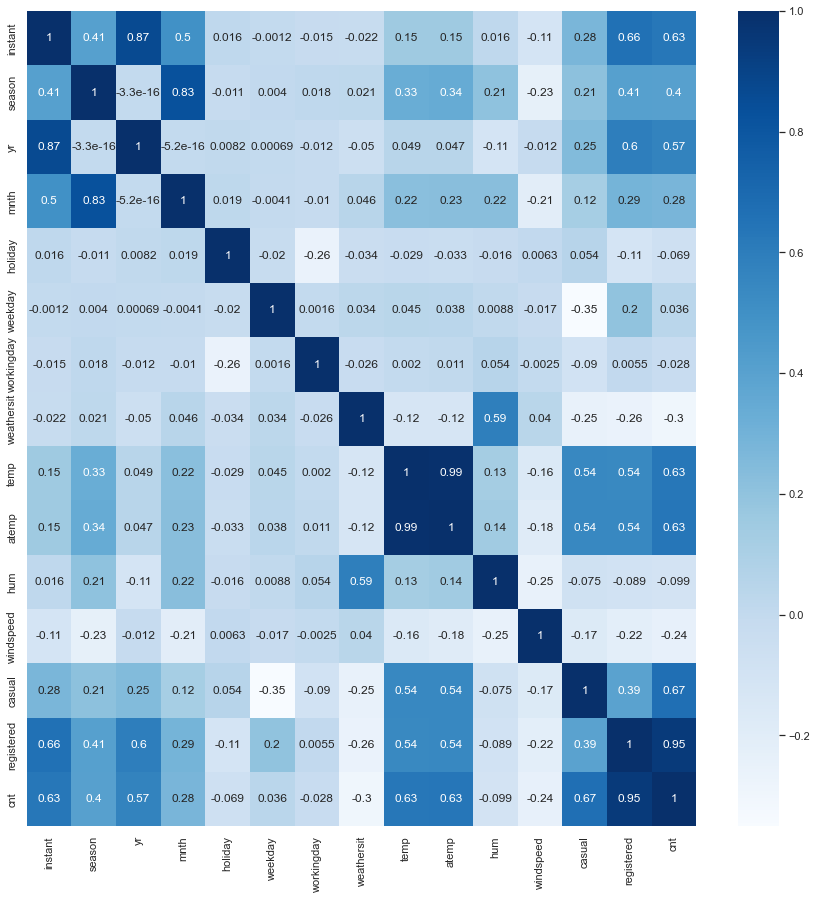

In [8]:
sns.set(font_scale=1.0)
plt.subplots(figsize=(15,15))
sns.heatmap(bikedata.corr(),annot=bikedata.corr(),cmap="Blues")
plt.show()

### Separating numerical features and placing them in <code>bikedata_2</code>

In [9]:
bikedata_2 = bikedata[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum'
               , 'windspeed', 'cnt']]
bikedata_2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bikedata_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Mapping proper names for better visibilty
1. <b>season : </b> (1:spring, 2:summer, 3:fall, 4:winter)
2. <b>yr : </b>year (0: 2018, 1:2019)
3. <b>mnth : </b>month ( 1 to 12)
4. <b>weekday : </b>day of the week
5. <b>workingday : </b>if day is neither weekend nor holiday is 1, otherwise is 0.
6. <b>weathersit :</b> 
             1: Clear, Few clouds, Partly cloudy, Partly cloudy
             2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
             3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
             4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
7. <b>holiday : </b>weather day is a holiday or not

In [11]:
bikedata_2['season'] = bikedata_2['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bikedata_2['yr'] = bikedata_2['yr'].map({0:'2018',1:'2019'})
bikedata_2['mnth'] = bikedata_2['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bikedata_2['weekday'] = bikedata_2['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
bikedata_2['workingday'] = bikedata_2['workingday'].map({0:'No',1:'Yes'})
bikedata_2['weathersit'] = bikedata_2['weathersit'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',
                                                         4:'Worse/HeavyRain'})
bikedata_2['holiday'] = bikedata_2['holiday'].map({0:'No',1:'Yes'})

bikedata_2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No,Tues,Yes,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,Wed,Yes,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,Thurs,Yes,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,Fri,Yes,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,Sat,Yes,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualisation using pairplot for insights

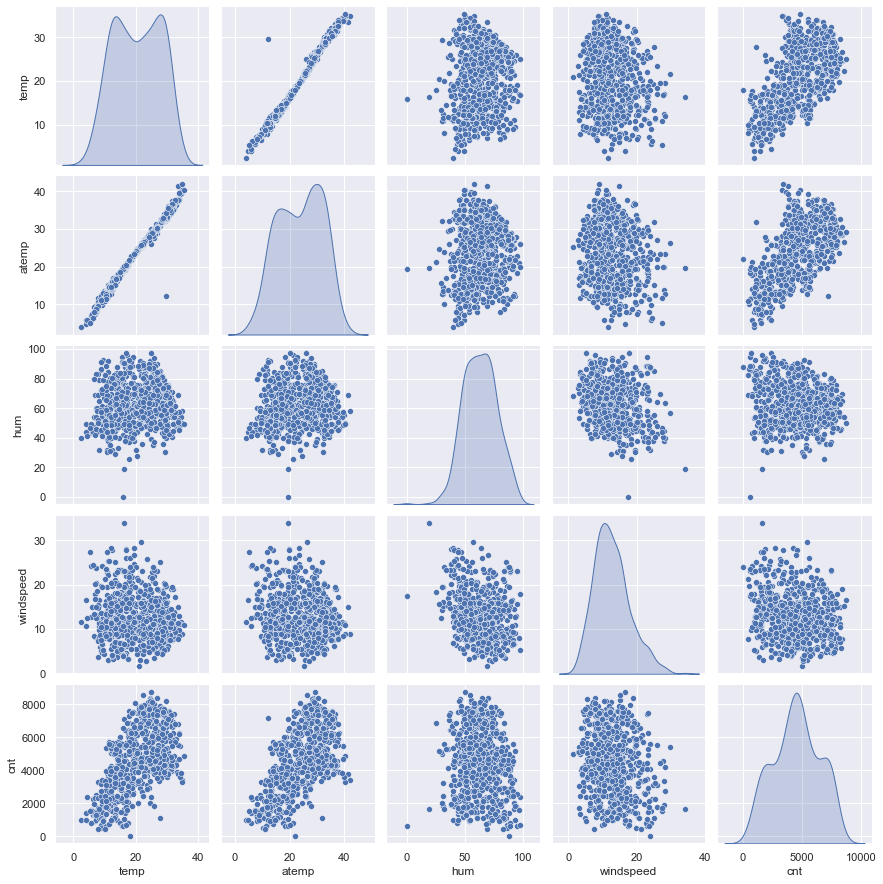

In [12]:
sns.pairplot(bikedata_2[['temp','atemp','hum','windspeed','cnt']],diag_kind='kde')
plt.show()

### Insights
1. <b>mnth VS cnt: </b>Count is >5000 in month of may, june, july, august, september, october
2. <b>season VS cnt: </b>Count is the most during fall
3. <b>yr VS cnt: </b>Count has increased exponentialy in the year 2019 W.R.T. 2018
4. <b>holiday VS cnt: </b>Count increases during holidays
5. <b>workingday VS cnt: </b>Count increases during non-working days 
6. <b>weathersit VS cnt: </b>Count is the most during when weather is Clear, Few clouds, Partly cloudy, Partly cloudy
7. <b>weekday VS cnt: </b>Count is the least on tuesday, wednesday and thursday

## Visualisation using barplot for insights

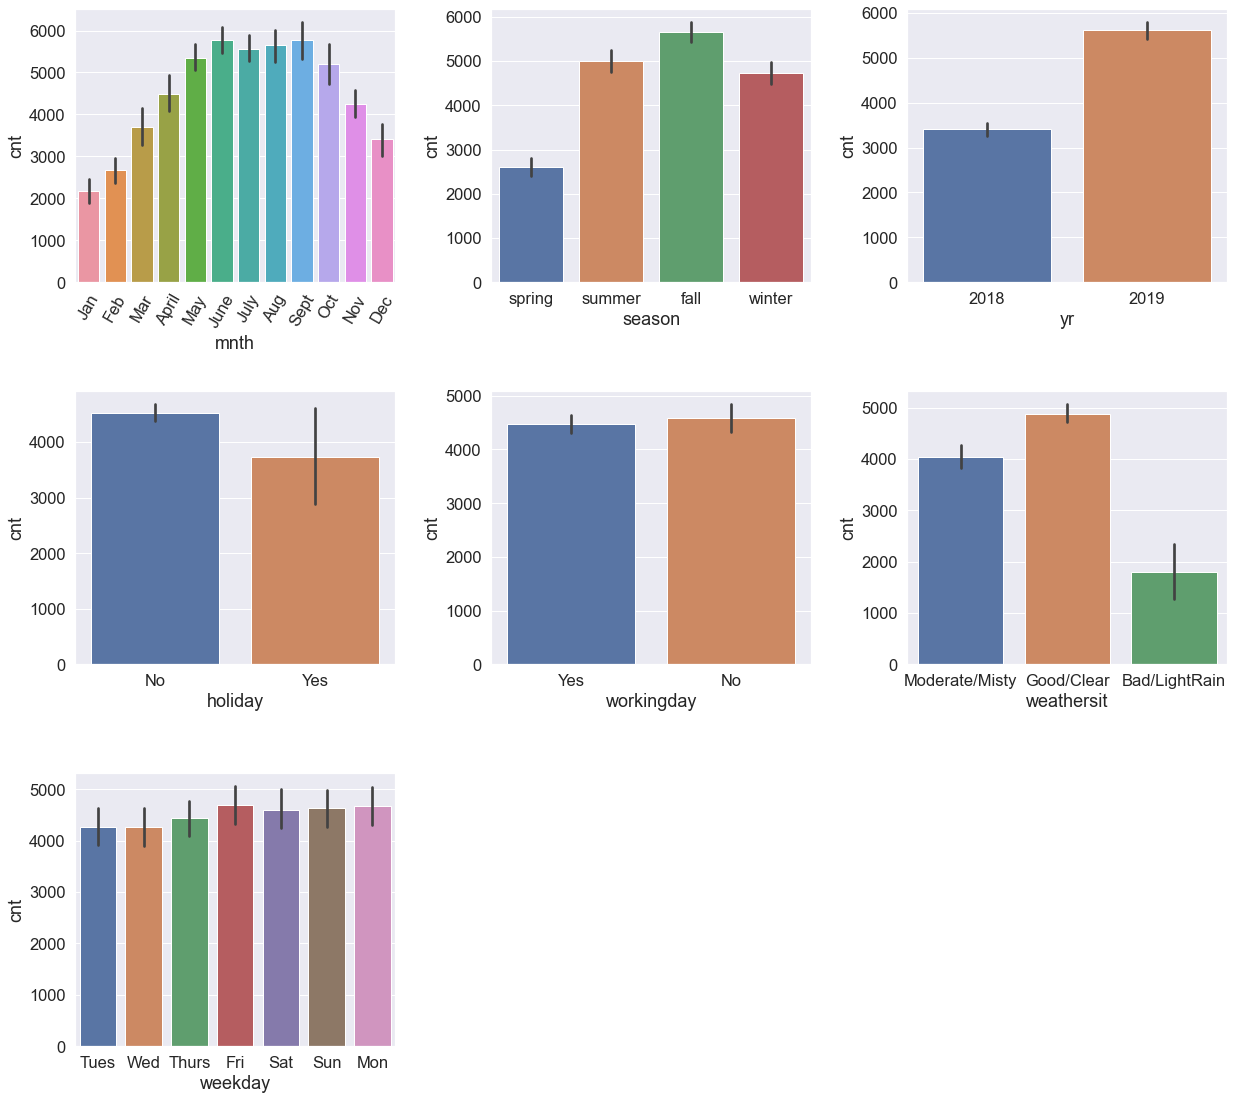

In [13]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 18))
categorical_cols = ["mnth","season","yr","holiday","workingday","weathersit","weekday"]
for i in range(0,7):
    plt.subplot(3,3,i+1)
    if i==0: #rotation only reqd for month vs count 
        plt.xticks(rotation=60)
    sns.barplot(x= categorical_cols[i], y= "cnt", data=bikedata_2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

## Checking datatypes of important features

In [14]:
bikedata_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


## Converting categorical features to a <code>category</code> data type

In [15]:
for i in categorical_cols:
    bikedata_2[i] = bikedata_2[i].astype('category')

In [16]:
bikedata_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


## Creating dummies for Linear model 
<br>
<li>Dropping first column using <code><b>drop_first=True</b></code> because we can predict 1st on basis of others</li>
<li>Creating dummies for categorical values</li>

In [17]:
dummy_bikedata = pd.get_dummies(bikedata_2[categorical_cols], drop_first=True)
dummy_bikedata.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,holiday_Yes,workingday_Yes,weathersit_Good/Clear,weathersit_Moderate/Misty,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


## Combining both the dataframe, <code>bikedata_2</code> and dummy variable <code>dummy_bikedata</code>

In [18]:
bikedata_3 = pd.concat([bikedata_2,dummy_bikedata], axis=1)
bikedata_3.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,holiday_Yes,workingday_Yes,weathersit_Good/Clear,weathersit_Moderate/Misty,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
0,spring,2018,Jan,No,Tues,Yes,Moderate/Misty,14.110847,18.18125,80.5833,...,0,1,0,1,0,0,0,0,1,0
1,spring,2018,Jan,No,Wed,Yes,Moderate/Misty,14.902598,17.68695,69.6087,...,0,1,0,1,0,0,0,0,0,1
2,spring,2018,Jan,No,Thurs,Yes,Good/Clear,8.050924,9.47025,43.7273,...,0,1,1,0,0,0,0,1,0,0
3,spring,2018,Jan,No,Fri,Yes,Good/Clear,8.200000,10.60610,59.0435,...,0,1,1,0,0,0,0,0,0,0
4,spring,2018,Jan,No,Sat,Yes,Good/Clear,9.305237,11.46350,43.6957,...,0,1,1,0,0,1,0,0,0,0


## Dropping columns from which dummy varibles were created
<br>
<li>We don't need older columns because we have already made dummy variables for the same</li>
<li>We will drop the columns <code>mnth, season, yr, holiday, workingday, weathersit, weekday</code></li>

In [19]:
bikedata_3.drop(categorical_cols, axis=1, inplace = True)
bikedata_3.head()

,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,...,holiday_Yes,workingday_Yes,weathersit_Good/Clear,weathersit_Moderate/Misty,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,...,0,1,1,0,0,1,0,0,0,0


In [20]:
bikedata_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   temp                       730 non-null    float64
 1   atemp                      730 non-null    float64
 2   hum                        730 non-null    float64
 3   windspeed                  730 non-null    float64
 4   cnt                        730 non-null    int64  
 5   mnth_Aug                   730 non-null    uint8  
 6   mnth_Dec                   730 non-null    uint8  
 7   mnth_Feb                   730 non-null    uint8  
 8   mnth_Jan                   730 non-null    uint8  
 9   mnth_July                  730 non-null    uint8  
 10  mnth_June                  730 non-null    uint8  
 11  mnth_Mar                   730 non-null    uint8  
 12  mnth_May                   730 non-null    uint8  
 13  mnth_Nov                   730 non-null    uint8  

# Splitting dataset using <code>train_test_split</code> from <code>sklearn</code>

In [21]:
# importing statsmodel and sklearn libraries for Linear regression model building

import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#### splitting the date into two train and test dataframes

In [22]:
df_train_bike, df_test_bike = train_test_split(bikedata_3, train_size=0.70, random_state=100)

#### Checking the columns and rows for verifying 

In [23]:
print(df_train_bike.shape)
print(df_test_bike.shape)
print("Shape of training dataset- Records:",df_train_bike.shape[0]," Features:",df_train_bike.shape[1])
print("Shape of testing dataset- Records:",df_test_bike.shape[0]," Features:",df_test_bike.shape[1])

(510, 30)
(220, 30)
Shape of training dataset- Records: 510  Features: 30
Shape of testing dataset- Records: 220  Features: 30


In [24]:
df_train_bike.head()

,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,...,holiday_Yes,workingday_Yes,weathersit_Good/Clear,weathersit_Moderate/Misty,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
576,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0
426,16.980847,20.6746,62.1250,10.792293,4066,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
728,10.489153,11.5850,48.3333,23.500518,1796,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
482,15.443347,18.8752,48.9583,8.708325,4220,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
111,13.803347,16.0977,72.9583,14.707907,1683,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


### Importing MinMax scaler from sklearn library

In [25]:
from sklearn.preprocessing import MinMaxScaler
scale_target = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [26]:
df_train_bike[scale_target].head()

,temp,atemp,hum,windspeed,cnt
576,29.246653,33.1448,70.4167,11.083475,7216
426,16.980847,20.6746,62.1250,10.792293,4066
728,10.489153,11.5850,48.3333,23.500518,1796
482,15.443347,18.8752,48.9583,8.708325,4220
111,13.803347,16.0977,72.9583,14.707907,1683


## Defining scaler for minmax scaling

In [27]:
scaler = MinMaxScaler()
df_train_bike[scale_target] = scaler.fit_transform(df_train_bike[scale_target])
df_train_bike[scale_target].head()

,temp,atemp,hum,windspeed,cnt
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


## Checking for correlation using corr()

In [28]:
df_train_bike.corr()

,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,...,holiday_Yes,workingday_Yes,weathersit_Good/Clear,weathersit_Moderate/Misty,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
temp,1.000000,0.989539,0.155252,-0.187281,0.645048,0.387176,-0.273091,-2.962130e-01,-0.446941,0.413678,...,-0.066405,-0.007143,0.100510,-0.089452,0.006540,-1.986476e-02,0.024972,-0.044303,-0.038042,-0.002284
atemp,0.989539,1.000000,0.169341,-0.215108,0.647944,0.359727,-0.262072,-2.996857e-01,-0.451026,0.406832,...,-0.070760,0.004316,0.099074,-0.085086,0.006044,-1.905659e-02,0.011785,-0.041378,-0.037163,0.002480
hum,0.155252,0.169341,1.000000,-0.267126,-0.058793,0.052949,0.057615,-1.297797e-01,-0.071906,-0.054070,...,-0.029224,0.021192,-0.556435,0.479436,-0.027699,5.160448e-02,0.002489,0.028329,-0.030833,0.033232
windspeed,-0.187281,-0.215108,-0.267126,1.000000,-0.253038,-0.111460,-0.061179,1.329361e-01,0.006582,-0.085671,...,0.017458,-0.002071,-0.000932,-0.029892,0.018007,1.851117e-03,-0.016545,-0.055798,0.035097,0.035326
cnt,0.645048,0.647944,-0.058793,-0.253038,1.000000,0.227578,-0.143546,-2.703505e-01,-0.378296,0.158087,...,-0.095948,-0.009071,0.245832,-0.169715,0.031474,-4.037399e-02,0.012712,-0.020949,-0.071013,-0.018672
mnth_Aug,0.387176,0.359727,0.052949,-0.111460,0.227578,1.000000,-0.098929,-8.713318e-02,-0.101421,-0.093814,...,-0.052728,-0.012875,0.004825,0.015258,0.005308,-3.867814e-03,0.032882,0.007209,0.007536,-0.064591
mnth_Dec,-0.273091,-0.262072,0.057615,-0.061179,-0.143546,-0.098929,1.000000,-8.109830e-02,-0.094396,-0.087317,...,-0.004302,-0.025020,-0.013065,0.017231,0.043024,3.340398e-02,-0.011872,0.003762,0.026120,-0.011302
mnth_Feb,-0.296213,-0.299686,-0.129780,0.132936,-0.270351,-0.087133,-0.081098,1.000000e+00,-0.083141,-0.076906,...,0.056524,-0.003471,0.011910,-0.012125,0.007614,-4.204408e-17,-0.032786,0.009193,-0.027519,0.017471
mnth_Jan,-0.446941,-0.451026,-0.071906,0.006582,-0.378296,-0.101421,-0.094396,-8.314110e-02,1.000000,-0.089516,...,0.037412,-0.015711,-0.044950,0.065009,-0.003545,7.463226e-03,0.003635,0.038639,0.019669,-0.016947
mnth_July,0.413678,0.406832,-0.054070,-0.085671,0.158087,-0.093814,-0.087317,-7.690558e-02,-0.089516,1.000000,...,-0.046539,-0.012361,0.115948,-0.115763,0.035315,-7.781744e-02,-0.001034,-0.049107,0.019553,0.041722


## Plotting correlation using heatmap
<b>1.</b> The heatmap makes it evident which variables are highly collinear with the target variable and which are multicollinear in nature.
<br><b>2.</b> This map will be used repeatedly as we create the linear model to evaluate the various associated values together with the VIF and p-value, allowing us to choose the appropriate variable to include or exclude from the model.

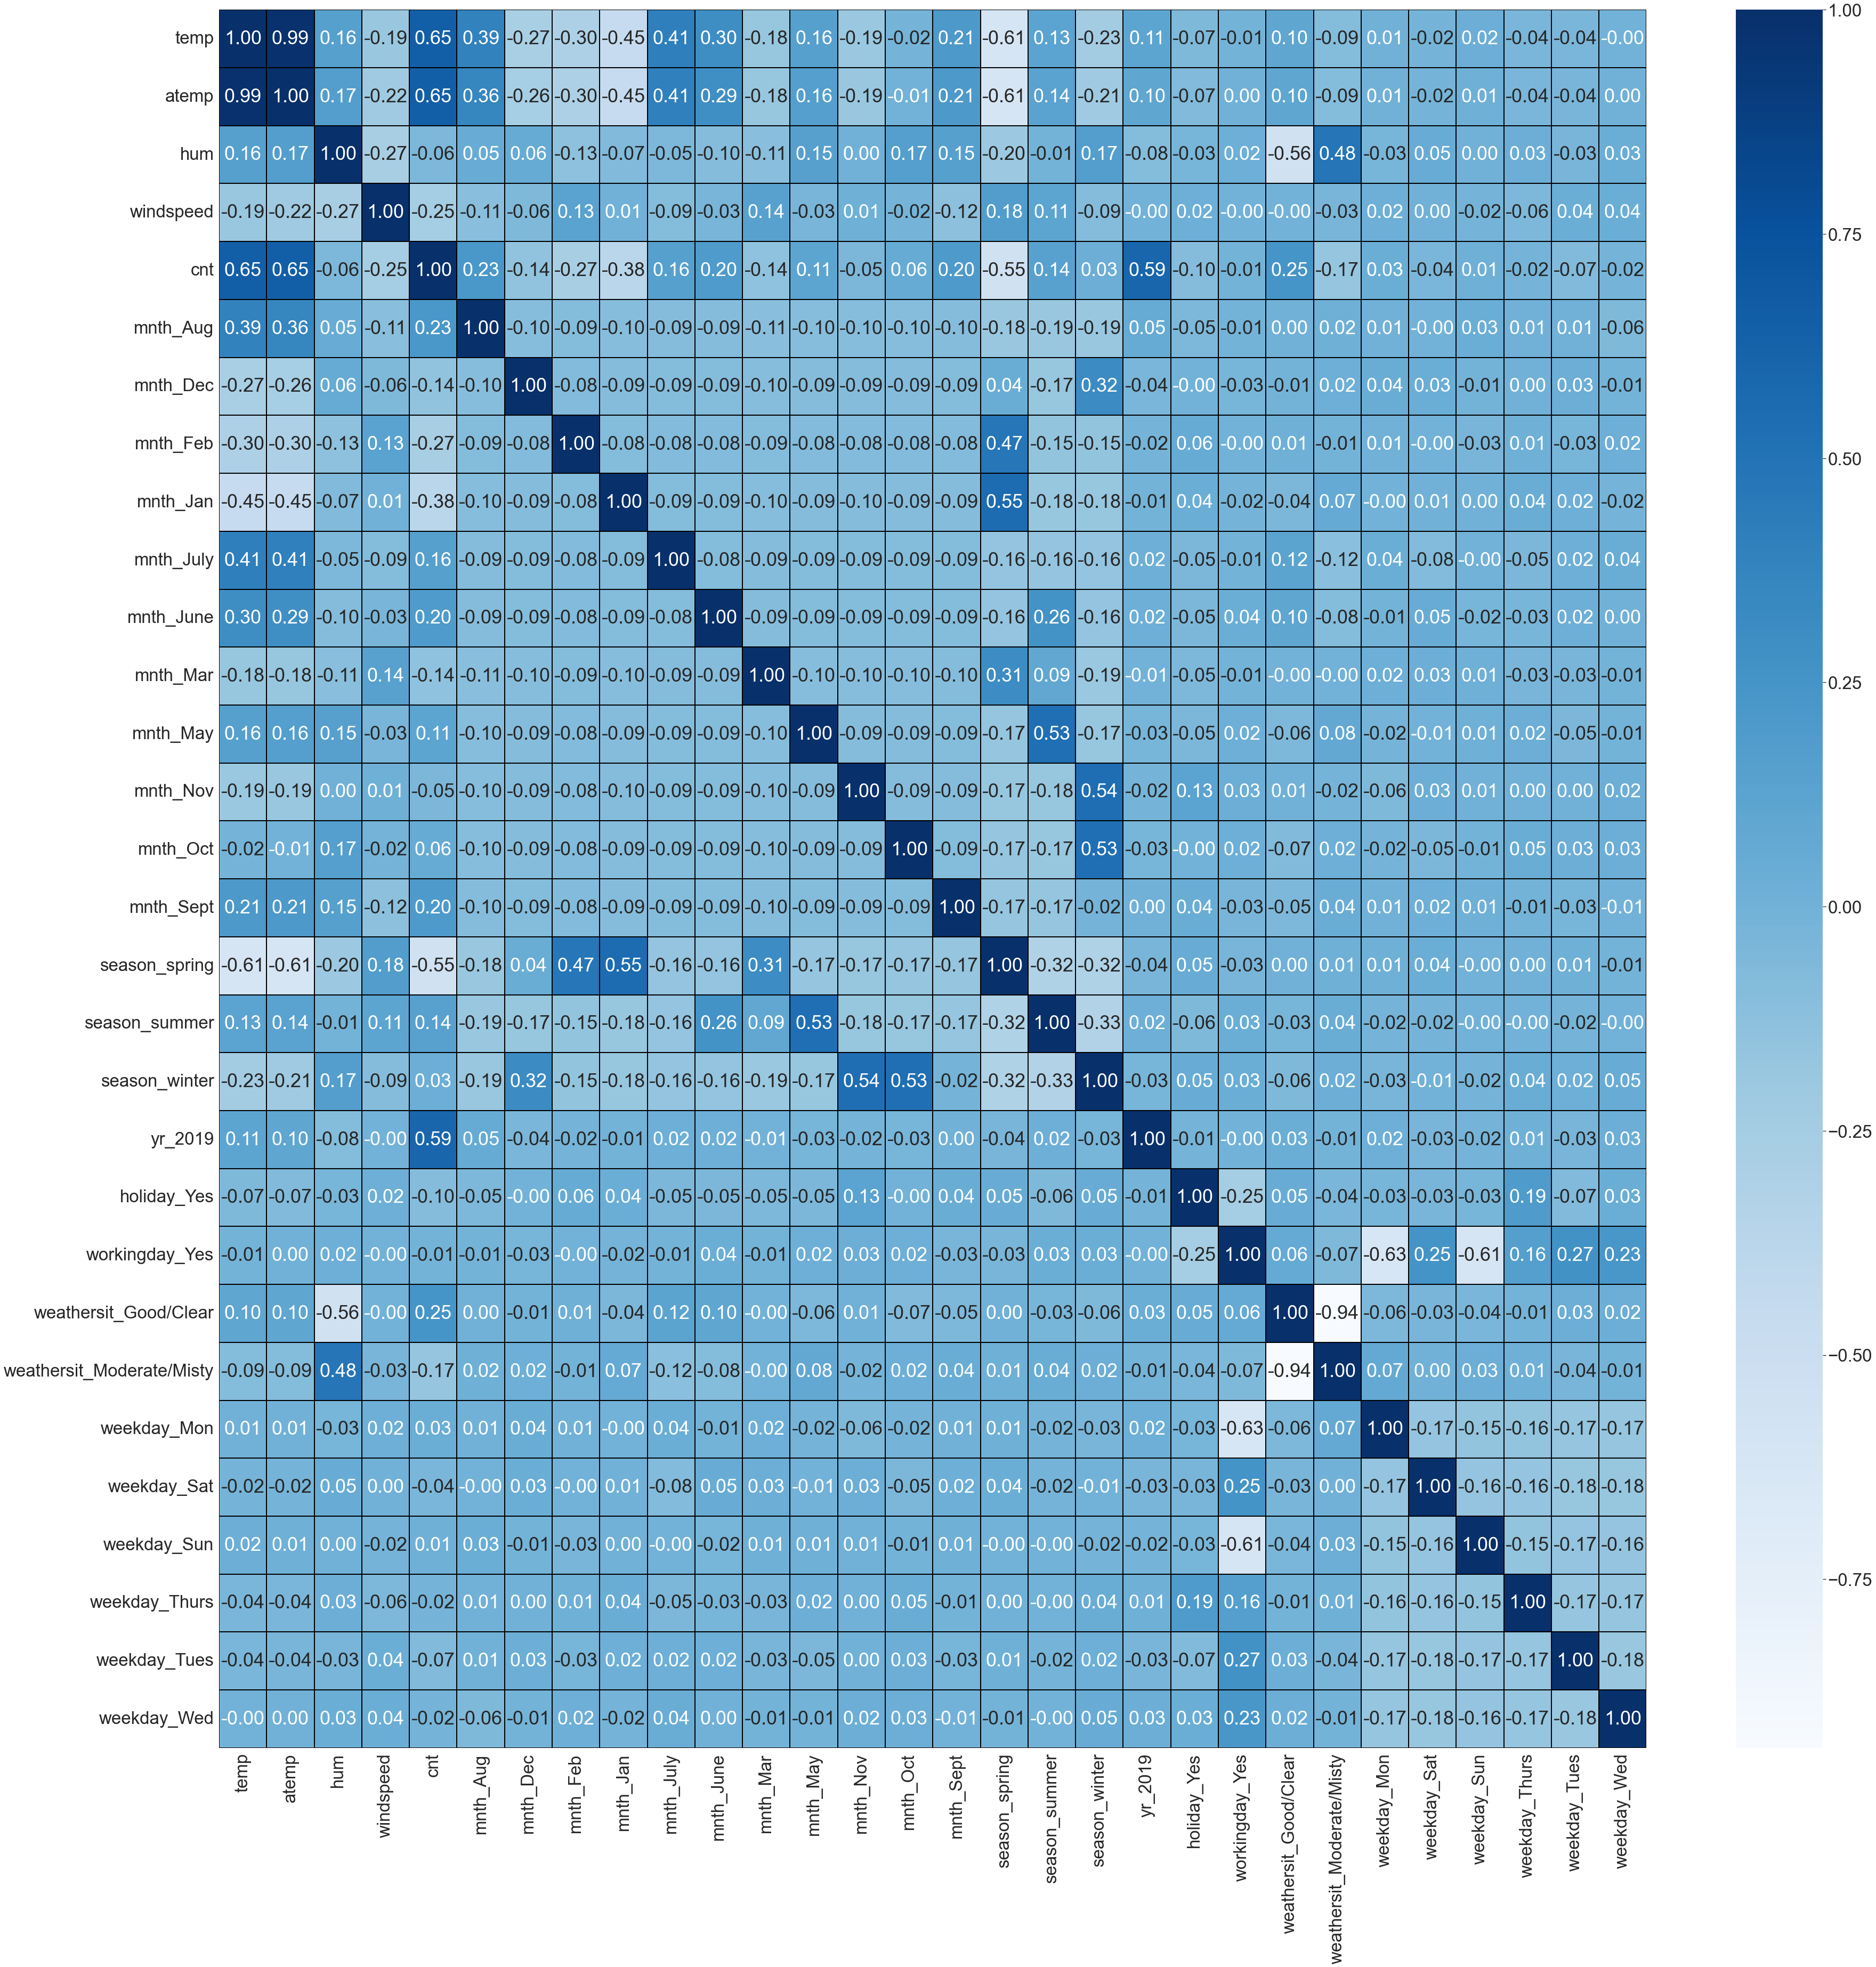

In [29]:
sns.set(font_scale=3.0)
plt.subplots(figsize=(60,60))
sns.heatmap(df_train_bike.corr(),annot=df_train_bike.corr(),cmap="Blues",linewidths=0.1, linecolor='black', fmt='.2f')
plt.show()

# Model building
<br>
<b>1.</b>Separating the training set into the X train and y train sets in order to create the model
<br>
<b>2.</b>We'll proceed and create the model while keeping in mind that the target variable is cnt.

In [30]:
y_train = df_train_bike.pop('cnt')
X_train = df_train_bike

### Importing RFE and LinearRegression

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Running RFE with the variable's output number set to 15

In [32]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # using RFE
rfe = rfe.fit(X_train, y_train)

### Generating a list of RFE-selected characteristics

In [33]:
pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

,0,1,2
0,temp,True,1
1,atemp,False,3
2,hum,True,1
3,windspeed,True,1
4,mnth_Aug,False,10
5,mnth_Dec,True,1
6,mnth_Feb,False,2
7,mnth_Jan,True,1
8,mnth_July,True,1
9,mnth_June,False,12


### RFE-selected features list during feature selection

In [34]:
rfe_col = X_train.columns[rfe.support_]
df1 = pd.DataFrame(rfe_col)
df1.rename(columns = {0 : 'Features'}, inplace = True)
df1

,Features
0,temp
1,hum
2,windspeed
3,mnth_Dec
4,mnth_Jan
5,mnth_July
6,mnth_Nov
7,mnth_Sept
8,season_spring
9,season_summer


### RFE-rejected feature list during feature selection

In [35]:
X_train.columns[~rfe.support_]
df1 = pd.DataFrame(X_train.columns[~rfe.support_])
df1.rename(columns = {0 : 'Features'}, inplace = True)
df1

,Features
0,atemp
1,mnth_Aug
2,mnth_Feb
3,mnth_June
4,mnth_Mar
5,mnth_May
6,mnth_Oct
7,workingday_Yes
8,weekday_Mon
9,weekday_Sat


### Generating a new train dataframe using the characteristics chosen by RFE

In [36]:
X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,temp,hum,windspeed,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sept,season_spring,season_summer,season_winter,yr_2019,holiday_Yes,weathersit_Good/Clear,weathersit_Moderate/Misty
576,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0,1,0,1,0
426,0.442393,0.640189,0.255342,0,0,0,0,0,1,0,0,1,0,0,1
728,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0,1,0,1,0
482,0.395666,0.504508,0.188475,0,0,0,0,0,0,1,0,1,0,0,1
111,0.345824,0.751824,0.380981,0,0,0,0,0,0,1,0,0,0,0,1


# Model 1

#### Adding a constant variable  to above dataset because statsmodel excludes const

In [37]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

#### Running the linear model

In [38]:
# Make a preliminary fitted model.
lm = sm.OLS(y_train,X_train_rfe).fit()

In [39]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          8.15e-189
Time:                        00:29:00   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0732      0.048      1.540      0.124      -0.020       0.167
temp                          0.4815      0.037     13.005      0.000       0.409       0.554
hum                          -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                    -0.1887      0.026     -7.315      0.000      -0.239      -0.138
mnth_Dec                     -0.0355      0.018     -2.024      0.043      -0.070      -0.001
mnth_Jan                     -0.0434      0.018     -2.393      0.017      -0.079      -0.008
mnth_July                    -0.0553      0.018     -3.030      0.003      -0.091      -0.019
mnth_Nov                     -0.0387      0.019     -2.057      0.040      -0.076      -0.002
mnth_Sept                     0.0755      0.017      4.466      0.000       0.042       0.109
season_spring                -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer                 0.0423      0.015      2.761      0.006       0.012       0.072
season_winter                 0.1019      0.018      5.656      0.000       0.067       0.137
yr_2019                       0.2304      0.008     28.487      0.000       0.215       0.246
holiday_Yes                  -0.0911      0.026     -3.557      0.000      -0.141      -0.041
weathersit_Good/Clear         0.2465      0.026      9.331      0.000       0.195       0.298
weathersit_Moderate/Misty     0.1922      0.025      7.687      0.000       0.143       0.241
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dropping const explicitly as we have no need of it's VIF for now

In [40]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

#### Importing libraries to validate the VIF values of feature variables

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Functon <code>get_current_VIF</code> will create a dataframe that will contain the names of all the feature variables and their respective VIF

In [42]:
def get_current_VIF(df_rfe):
    vif = pd.DataFrame()
    vif['Features'] = df_rfe.columns
    vif['VIF'] = [variance_inflation_factor(df_rfe.values, i) for i in range(df_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)
get_current_VIF(X_train_rfe)

,Features,VIF
1,hum,26.33
0,temp,25.12
13,weathersit_Good/Clear,15.65
14,weathersit_Moderate/Misty,9.30
8,season_spring,5.75
2,windspeed,4.67
10,season_winter,4.53
9,season_summer,3.30
11,yr_2019,2.10
6,mnth_Nov,1.91


# Model 2
#### <li>Deleting feature hum since the VIF value is extremely high.</li>

In [43]:
X_train_rfe2 = X_train_rfe.drop('hum', axis = 1)

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          4.75e-186
Time:                        00:29:00   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0467      0.039     -1.194      0.233      -0.124       0.030
temp                          0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                    -0.1585      0.025     -6.276      0.000      -0.208      -0.109
mnth_Dec                     -0.0428      0.018     -2.413      0.016      -0.078      -0.008
mnth_Jan                     -0.0500      0.018     -2.719      0.007      -0.086      -0.014
mnth_July                    -0.0500      0.019     -2.703      0.007      -0.086      -0.014
mnth_Nov                     -0.0395      0.019     -2.064      0.040      -0.077      -0.002
mnth_Sept                     0.0687      0.017      4.015      0.000       0.035       0.102
season_spring                -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_summer                 0.0349      0.015      2.251      0.025       0.004       0.065
season_winter                 0.0869      0.018      4.831      0.000       0.052       0.122
yr_2019                       0.2345      0.008     28.687      0.000       0.218       0.251
holiday_Yes                  -0.0918      0.026     -3.522      0.000      -0.143      -0.041
weathersit_Good/Clear         0.2917      0.025     11.840      0.000       0.243       0.340
weathersit_Moderate/Misty     0.2117      0.025      8.462      0.000       0.163       0.261
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
get_current_VIF(X_train_rfe2)

,Features,VIF
12,weathersit_Good/Clear,15.65
0,temp,14.02
13,weathersit_Moderate/Misty,8.82
1,windspeed,4.66
7,season_spring,4.41
9,season_winter,3.36
8,season_summer,2.78
10,yr_2019,2.08
5,mnth_Nov,1.89
3,mnth_Jan,1.74


# Model 3
<li>Deleting feature <code>weathersit Moderate/Misty</code> owing to extremely high VIF values, as all p-values are less than 0.05 </li>
<li>The features <code>temp</code> and <code>weathersit Good/Clear</code> have much larger VIF values, but EDA and visualisation show that they have a significant effect on bike rental demand.</li>

In [45]:
X_train_rfe3 = X_train_rfe2.drop('weathersit_Moderate/Misty', axis = 1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

#One can also use fit_transform()
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     169.1
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.01e-172
Time:                        00:29:00   Log-Likelihood:                 470.40
No. Observations:                 510   AIC:                            -912.8
Df Residuals:                     496   BIC:                            -853.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1442      0.034      4.222      0.000       0.077       0.211
temp                      0.4520      0.039     11.669      0.000       0.376       0.528
windspeed                -0.1798      0.027     -6.695      0.000      -0.233      -0.127
mnth_Dec                 -0.0317      0.019     -1.674      0.095      -0.069       0.005
mnth_Jan                 -0.0410      0.020     -2.091      0.037      -0.080      -0.002
mnth_July                -0.0554      0.020     -2.802      0.005      -0.094      -0.017
mnth_Nov                 -0.0296      0.020     -1.449      0.148      -0.070       0.011
mnth_Sept                 0.0667      0.018      3.647      0.000       0.031       0.103
season_spring            -0.0662      0.023     -2.881      0.004      -0.111      -0.021
season_summer             0.0405      0.017      2.447      0.015       0.008       0.073
season_winter             0.0776      0.019      4.043      0.000       0.040       0.115
yr_2019                   0.2380      0.009     27.280      0.000       0.221       0.255
holiday_Yes              -0.0874      0.028     -3.139      0.002      -0.142      -0.033
weathersit_Good/Clear     0.0960      0.009     10.571      0.000       0.078       0.114
==============================================================================
Omnibus:                      101.079   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.095
Skew:                          -0.908   Prob(JB):                     1.55e-71
Kurtosis:                       6.471   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
get_current_VIF(X_train_rfe3)

,Features,VIF
0,temp,5.85
1,windspeed,4.61
7,season_spring,2.96
9,season_winter,2.85
12,weathersit_Good/Clear,2.73
8,season_summer,2.21
10,yr_2019,2.07
5,mnth_Nov,1.82
3,mnth_Jan,1.64
4,mnth_July,1.60


# Model 4
#### <li>Feature <code>mnth_Nov</code> feature is being removed due to a high p-value of 0.148.</li>

In [47]:
X_train_rfe4 = X_train_rfe3.drop('mnth_Nov', axis = 1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     182.6
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.07e-173
Time:                        00:29:00   Log-Likelihood:                 469.32
No. Observations:                 510   AIC:                            -912.6
Df Residuals:                     497   BIC:                            -857.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1324      0.033      3.988      0.000       0.067       0.198
temp                      0.4664      0.037     12.446      0.000       0.393       0.540
windspeed                -0.1802      0.027     -6.703      0.000      -0.233      -0.127
mnth_Dec                 -0.0209      0.017     -1.199      0.231      -0.055       0.013
mnth_Jan                 -0.0375      0.019     -1.922      0.055      -0.076       0.001
mnth_July                -0.0552      0.020     -2.790      0.005      -0.094      -0.016
mnth_Sept                 0.0708      0.018      3.916      0.000       0.035       0.106
season_spring            -0.0602      0.023     -2.661      0.008      -0.105      -0.016
season_summer             0.0446      0.016      2.729      0.007       0.012       0.077
season_winter             0.0706      0.019      3.796      0.000       0.034       0.107
yr_2019                   0.2378      0.009     27.233      0.000       0.221       0.255
holiday_Yes              -0.0923      0.028     -3.334      0.001      -0.147      -0.038
weathersit_Good/Clear     0.0953      0.009     10.494      0.000       0.077       0.113
==============================================================================
Omnibus:                       94.595   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.484
Skew:                          -0.868   Prob(JB):                     3.75e-63
Kurtosis:                       6.242   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
get_current_VIF(X_train_rfe4)

,Features,VIF
0,temp,5.79
1,windspeed,4.57
6,season_spring,2.96
11,weathersit_Good/Clear,2.71
7,season_summer,2.21
9,yr_2019,2.07
8,season_winter,2.00
3,mnth_Jan,1.64
4,mnth_July,1.59
5,mnth_Sept,1.33


# Model 5
#### <li>Feature <code>mnth_Dec</code> feature is being removed due to a high p-value of 0.231.</li>

In [49]:
X_train_rfe5 = X_train_rfe4.drop('mnth_Dec', axis = 1)

X_train_lm5 = sm.add_constant(X_train_rfe5)

lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     198.9
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.93e-174
Time:                        00:29:00   Log-Likelihood:                 468.59
No. Observations:                 510   AIC:                            -913.2
Df Residuals:                     498   BIC:                            -862.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1230      0.032      3.811      0.000       0.060       0.186
temp                      0.4767      0.036     13.062      0.000       0.405       0.548
windspeed                -0.1767      0.027     -6.610      0.000      -0.229      -0.124
mnth_Jan                 -0.0324      0.019     -1.704      0.089      -0.070       0.005
mnth_July                -0.0555      0.020     -2.804      0.005      -0.094      -0.017
mnth_Sept                 0.0725      0.018      4.018      0.000       0.037       0.108
season_spring            -0.0591      0.023     -2.614      0.009      -0.104      -0.015
season_summer             0.0468      0.016      2.880      0.004       0.015       0.079
season_winter             0.0693      0.019      3.733      0.000       0.033       0.106
yr_2019                   0.2378      0.009     27.218      0.000       0.221       0.255
holiday_Yes              -0.0913      0.028     -3.298      0.001      -0.146      -0.037
weathersit_Good/Clear     0.0951      0.009     10.472      0.000       0.077       0.113
==============================================================================
Omnibus:                       92.324   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.195
Skew:                          -0.854   Prob(JB):                     1.75e-60
Kurtosis:                       6.168   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
get_current_VIF(X_train_rfe5)

,Features,VIF
0,temp,5.78
1,windspeed,4.57
5,season_spring,2.84
10,weathersit_Good/Clear,2.71
6,season_summer,2.21
8,yr_2019,2.07
7,season_winter,1.74
2,mnth_Jan,1.60
3,mnth_July,1.59
4,mnth_Sept,1.33


# Model 6
#### <li>Feature <code>mnth_Jan</code> feature is being removed due to a high p-value of 0.089.</li>

In [51]:
X_train_rfe6 = X_train_rfe5.drop('mnth_Jan', axis = 1)

# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe6)# Model 4
#### <li>Feature <code>mnth_Nov</code> feature is being removed due to a high p-value of 0.148.</li>

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     217.6
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          8.19e-175
Time:                        00:29:00   Log-Likelihood:                 467.10
No. Observations:                 510   AIC:                            -912.2
Df Residuals:                     499   BIC:                            -865.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1088      0.031      3.483      0.001       0.047       0.170
temp                      0.4927      0.035     13.944      0.000       0.423       0.562
windspeed                -0.1706      0.027     -6.427      0.000      -0.223      -0.118
mnth_July                -0.0569      0.020     -2.872      0.004      -0.096      -0.018
mnth_Sept                 0.0729      0.018      4.033      0.000       0.037       0.108
season_spring            -0.0638      0.022     -2.836      0.005      -0.108      -0.020
season_summer             0.0494      0.016      3.048      0.002       0.018       0.081
season_winter             0.0745      0.018      4.063      0.000       0.038       0.111
yr_2019                   0.2372      0.009     27.118      0.000       0.220       0.254
holiday_Yes              -0.0919      0.028     -3.315      0.001      -0.146      -0.037
weathersit_Good/Clear     0.0957      0.009     10.529      0.000       0.078       0.114
==============================================================================
Omnibus:                       91.943   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.468
Skew:                          -0.850   Prob(JB):                     2.51e-60
Kurtosis:                       6.166   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
get_current_VIF(X_train_rfe6)

,Features,VIF
0,temp,5.75
1,windspeed,4.55
9,weathersit_Good/Clear,2.71
5,season_summer,2.19
4,season_spring,2.12
7,yr_2019,2.06
6,season_winter,1.74
2,mnth_July,1.59
3,mnth_Sept,1.32
8,holiday_Yes,1.04


# Model 7
<li>Because of the significant collinearity with the temp variable, the feature <code>mnth_July</code> is being removed.</li>
<li>Even though for <code>temp</code>, VIF values are high, but we learned from the EDA that temperature has a significant influence, thus we will keep it.</li>
<li>Below is the graph which shows relation between <code>temp</code> and <code>mnth_July</code></li>

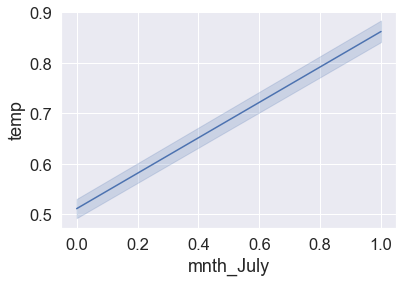

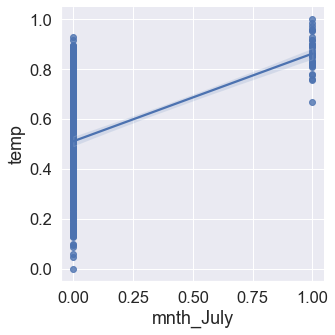

In [53]:
sns.set(font_scale=1.5)
sns.lineplot(x="mnth_July",y="temp",data=X_train_rfe6)
sns.lmplot(x="mnth_July",y="temp",data=X_train_rfe6)

In [54]:
X_train_rfe7 = X_train_rfe6.drop('mnth_July', axis = 1)

# Add a constant
X_train_lm7 = sm.add_constant(X_train_rfe7)

lr7 = sm.OLS(y_train, X_train_lm7).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     237.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          3.04e-174
Time:                        00:29:01   Log-Likelihood:                 462.92
No. Observations:                 510   AIC:                            -905.8
Df Residuals:                     500   BIC:                            -863.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1009      0.031      3.218      0.001       0.039       0.162
temp                      0.4782      0.035     13.576      0.000       0.409       0.547
windspeed                -0.1711      0.027     -6.398      0.000      -0.224      -0.119
mnth_Sept                 0.0884      0.017      5.083      0.000       0.054       0.123
season_spring            -0.0509      0.022     -2.292      0.022      -0.094      -0.007
season_summer             0.0665      0.015      4.382      0.000       0.037       0.096
season_winter             0.0884      0.018      4.958      0.000       0.053       0.123
yr_2019                   0.2378      0.009     27.008      0.000       0.221       0.255
holiday_Yes              -0.0906      0.028     -3.245      0.001      -0.145      -0.036
weathersit_Good/Clear     0.0944      0.009     10.318      0.000       0.076       0.112
==============================================================================
Omnibus:                       94.652   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.230
Skew:                          -0.883   Prob(JB):                     1.04e-60
Kurtosis:                       6.144   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
get_current_VIF(X_train_rfe7)

,Features,VIF
0,temp,4.66
1,windspeed,4.54
8,weathersit_Good/Clear,2.70
6,yr_2019,2.06
3,season_spring,2.02
4,season_summer,1.85
5,season_winter,1.57
2,mnth_Sept,1.22
7,holiday_Yes,1.04
